In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
df1.info(), df2.info(), df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

(None, None, None)

## Preprocessing

### Check duplicates

In [4]:
df1.duplicated().sum(), df2.duplicated().sum(), df3.duplicated().sum()

(0, 0, 197)

In [5]:
df3[df3.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


There are 197 duplicated values in df3. I'll drop them.

In [6]:
df3.drop_duplicates()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


### Data types

Only one column's data type needs to be converted, that is `start_ts` in df3. I'll convert it to time stamps.

In [7]:
df3['start_ts'] = pd.to_datetime(df3["start_ts"])

### Missing Values

In [8]:
df1.describe(), df2.describe(), df3.describe()

(       trips_amount
 count     64.000000
 mean    2145.484375
 std     3812.310186
 min        2.000000
 25%       20.750000
 50%      178.500000
 75%     2106.500000
 max    19558.000000,
        average_trips
 count      94.000000
 mean      599.953728
 std      1714.591098
 min         1.800000
 25%        14.266667
 50%        52.016667
 75%       298.858333
 max     10727.466667,
        duration_seconds
 count       1068.000000
 mean        2071.731273
 std          769.461125
 min            0.000000
 25%         1438.250000
 50%         1980.000000
 75%         2580.000000
 max         7440.000000)

In [9]:
df3[df3['duration_seconds'] <= 60.0]

,start_ts,weather_conditions,duration_seconds
15,2017-11-25 13:00:00,Good,60.0
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


There are 6 entries with 0 duration seconds. It's abnormal for a trip. I'll drop them.

In [10]:
df3 = df3[df3['duration_seconds'] >= 60.0]

### Preprocessing Summary:

These three dataframes are retrieved from database, the data is simple and the quality is good. Only one dataframe, the 'df3', needs to be manipulated. I converted one column data type, and deleted some duplicate values and 0 values.



## Analyzing

### Companies vs trips

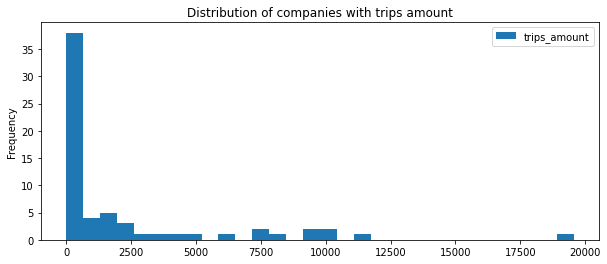

In [11]:
df1.plot(kind='hist', bins=30, title='Distribution of companies with trips amount', figsize=(10, 4))
plt.show()

In [12]:
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [13]:
len(df1[df1['trips_amount']<500]) / len(df1)

0.59375

The distribution of companies with amount of trips is sparse. 60% companies accomplish less than 500 trips. The best company, 'Flash Cab', leads far ahead of others. It is 1.7 times more than the second company,  

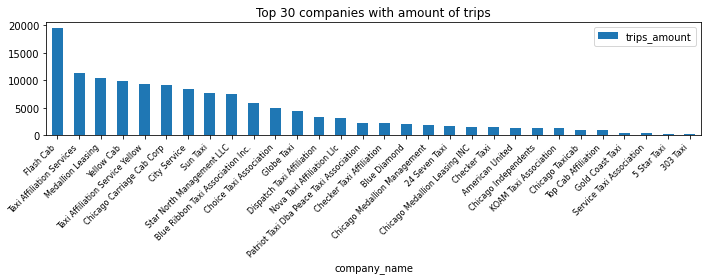

In [14]:
df1.iloc[:30, :].plot(kind='bar', x='company_name', title='Top 30 companies with amount of trips', figsize=(10, 4))
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

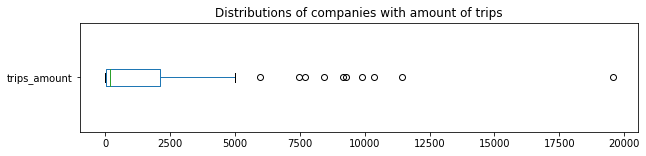

In [15]:
df1.plot(kind='box', title="Distributions of companies with amount of trips", figsize=(10, 2), vert=False)
plt.show()

We can see 75% companies made less than 2500 trips. While some companies performed much better than majority companies. 

### Dropoff locations and average trips 

In [16]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


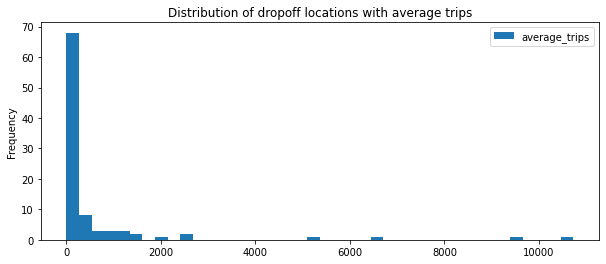

In [17]:
df2.plot(kind='hist', bins=40, title='Distribution of dropoff locations with average trips', figsize=(10, 4))
plt.show()

Both df1 (companies vs trips) and df2 (dropoff locations vs trips) obey Possion Distribution, which is most companies or dropoff locations occur few times.

#### Top 10 locations

In [18]:
df2.iloc[:10, 0]

0                  Loop
1           River North
2         Streeterville
3             West Loop
4                O'Hare
5             Lake View
6            Grant Park
7         Museum Campus
8            Gold Coast
9    Sheffield & DePaul
Name: dropoff_location_name, dtype: object

In [19]:
print(f"The top 10 dropoff locations are {df2.iloc[:10, 0].tolist()}")

The top 10 dropoff locations are ['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare", 'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast', 'Sheffield & DePaul']


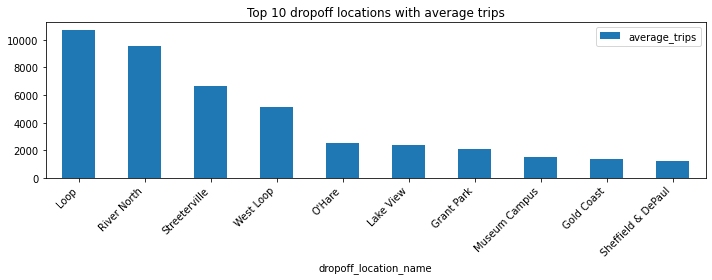

In [20]:
df2.iloc[:10, :].plot(kind='bar', x='dropoff_location_name', title='Top 10 dropoff locations with average trips', figsize=(10, 4))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Weather vs duration

In [21]:
df3['weekday'] = df3['start_ts'].apply(lambda x: x.weekday())
df3['duration_min'] = df3['duration_seconds'] / 60.0
df3.head()

,start_ts,weather_conditions,duration_seconds,weekday,duration_min
0,2017-11-25 16:00:00,Good,2410.0,5,40.166667
1,2017-11-25 14:00:00,Good,1920.0,5,32.000000
2,2017-11-25 12:00:00,Good,1543.0,5,25.716667
3,2017-11-04 10:00:00,Good,2512.0,5,41.866667
4,2017-11-11 07:00:00,Good,1440.0,5,24.000000


In [22]:
df3['weekday'].unique()

array([5])

All entries of 'df3' are extracted from Saturdays

#### Comparing means between good and bad weather

In [23]:
df3['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [24]:
bad_weather = df3[df3['weather_conditions'] == 'Bad']['duration_min']
good_weather = df3[df3['weather_conditions'] == 'Good']['duration_min']

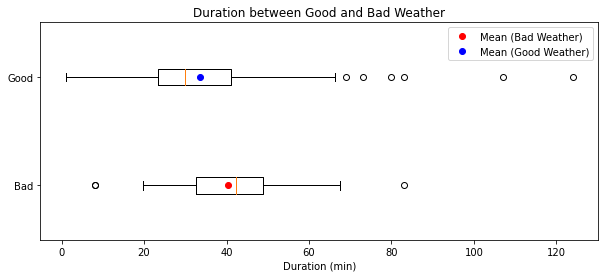

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
box1 = ax.boxplot(bad_weather, positions=[1], vert=False)
box2 = ax.boxplot(good_weather, positions=[2], vert=False)

plt.plot(bad_weather.mean(), 1, 'ro', label='Mean (Bad Weather)')
plt.plot(good_weather.mean(), 2, 'bo', label='Mean (Good Weather)')

ax.set_yticklabels(['Bad', 'Good'])
plt.title('Duration between Good and Bad Weather')
plt.xlabel('Duration (min)')
plt.legend() 

plt.show()

I will apply the two populations mean testing, since the samples of two groups are independent to each other.

* Null Hypothesis $𝐻0$: The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is same to good weather.
* Alternative Hypothesis $𝐻1$: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
* $\alpha = 0.05$

In [26]:
alpha = 0.05
results = st.ttest_ind(bad_weather, good_weather, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.4173590471585584e-11
We reject the null hypothesis


According to the test result, there is significant evidence to conclude that average duration of rides from the Loop to O'Hare Airport changes on rainy Saturdays.

## Conclusion

In this project, I analyzed three dataframes.

For the preprocessing, there was very little work to do thanks to the data quality. I only converted data type for one column and addressed missing and duplicated values.

Then I plotted some figures to show the relationship between taxi companies and trips, dropoff locations and trips. Both relationships obby Possion distribution, that is most companies or dropoff locations have quite few frequency, and there are some companies and locations take very high ratio.

Finally, I made a hypothesis to determine if the average duration of rides from the Loop to O'Hare International Airport is same between rainy and good weather on Saturdays. According to the test result, there is significant evidence to conclude they are different.